Importação de Bibliotecas e Módulos

In [52]:
import pandas as pd #Manipulação de conjuntos de dados
import numpy as np #Manipulações numéricas
import matplotlib.pyplot as plt #Análises gráficas
import seaborn as sns #Análises gráficas
import io #Manipulação de funções do sistema
import os #Manipulação de funções do sistema
import sys #Manipulação de funções do sistema

sys.path.insert(0, os.getcwd()) #Inicialização da pasta do projeto

from recursos import treino, teste, caminho #Importação dos Conjuntos
from matplotlib.widgets import TextBox #Visualização de textos
from statistics import mode #Ferramentas Estatísticas

Verificação dos Conjuntos de Dados

In [53]:
dfTreino = treino()
dfTreino.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [54]:
dfTest = teste()
dfTest.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.0,20258.0,Manual,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.0,53045.0,Manual,2,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.0,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.0,32486.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.0,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.0,24937.0,Automática,4,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.0,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.0,62074.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


Visualização das Informações dos Conjuntos

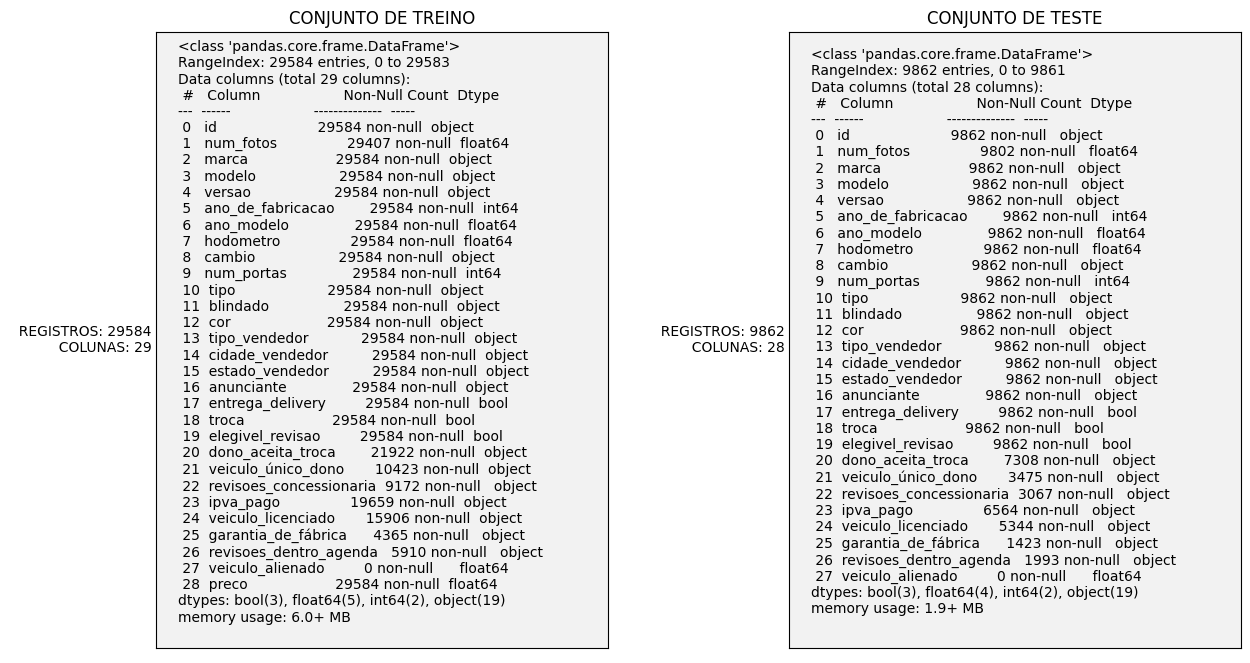

In [55]:
def buildInfo(df):
  registros, colunas = df.shape

  info1 = f"""
  REGISTROS: {registros}
  COLUNAS: {colunas}
  """

  buffer = io.StringIO()
  df.info(buf=buffer)
  info2 = buffer.getvalue()

  return info1, info2

fig, ax = plt.subplots(nrows= 1,
                       ncols= 2,
                       figsize= (14, 8),
                       gridspec_kw= {'wspace': 0.4, 'hspace': 0.4})

ax1, ax2 = ax

label, initial = buildInfo(dfTreino)
textBox = TextBox(ax1, label= label, initial= initial)
ax1.set_title('CONJUNTO DE TREINO')

label, initial = buildInfo(dfTest)
textBox = TextBox(ax2, label= label, initial= initial)
ax2.set_title('CONJUNTO DE TESTE')

plt.show()

Alteração de Tipos de Variáveis

In [56]:
dfTreino["ano_modelo"] = dfTreino["ano_modelo"].astype(int)
dfTest["ano_modelo"] = dfTest["ano_modelo"].astype(int)

Verificação de Dados Nulos ou Duplicados

In [57]:
def isNullOrDuplicates(df):
  tamanho, _ = df.shape

  nulos = df.isnull().sum()
  nulosPct = (nulos / tamanho) * 100

  duplicados = df[df.duplicated()].sum()
  duplicadosPct = (duplicados / tamanho) * 100

  DATA = [nulos, nulosPct, duplicados, duplicadosPct]
  MAP = {0:"Nulos",1:"Nulos %",2:"Duplicados",3:"Duplicados %"}

  return pd.DataFrame(data=DATA).T.rename(columns=MAP)

In [58]:
display(isNullOrDuplicates(dfTreino))

,Nulos,Nulos %,Duplicados,Duplicados %
id,0.0,0.000000,0.0,0.0
num_fotos,177.0,0.598296,0.0,0.0
marca,0.0,0.000000,0.0,0.0
modelo,0.0,0.000000,0.0,0.0
versao,0.0,0.000000,0.0,0.0
ano_de_fabricacao,0.0,0.000000,0.0,0.0
ano_modelo,0.0,0.000000,0.0,0.0
hodometro,0.0,0.000000,0.0,0.0
cambio,0.0,0.000000,0.0,0.0
num_portas,0.0,0.000000,0.0,0.0


In [59]:
display(isNullOrDuplicates(dfTest))

,Nulos,Nulos %,Duplicados,Duplicados %
id,0.0,0.000000,0.0,0.0
num_fotos,60.0,0.608396,0.0,0.0
marca,0.0,0.000000,0.0,0.0
modelo,0.0,0.000000,0.0,0.0
versao,0.0,0.000000,0.0,0.0
ano_de_fabricacao,0.0,0.000000,0.0,0.0
ano_modelo,0.0,0.000000,0.0,0.0
hodometro,0.0,0.000000,0.0,0.0
cambio,0.0,0.000000,0.0,0.0
num_portas,0.0,0.000000,0.0,0.0


Preenchimento de Valores Nulos

In [60]:
COLS_NULAS = ["dono_aceita_troca",
              "veiculo_único_dono",
              "revisoes_concessionaria",
              "ipva_pago",
              "veiculo_licenciado",
              "garantia_de_fábrica",
              "revisoes_dentro_agenda"]

#Feature num_fotos
criterio = mode(dfTreino["num_fotos"])
dfTreino["num_fotos"] = dfTreino["num_fotos"].fillna(criterio)

criterio = mode(dfTest["num_fotos"])
dfTest["num_fotos"] = dfTest["num_fotos"].fillna(criterio)

#Demais features
for feature in COLS_NULAS:
    dfTreino[feature] = dfTreino[feature].fillna(0)
    dfTest[feature] = dfTest[feature].fillna(0)


Verificação do Preenchimento

In [61]:
display(isNullOrDuplicates(dfTreino))

,Nulos,Nulos %,Duplicados,Duplicados %
id,0.0,0.0,0.0,0.0
num_fotos,0.0,0.0,0.0,0.0
marca,0.0,0.0,0.0,0.0
modelo,0.0,0.0,0.0,0.0
versao,0.0,0.0,0.0,0.0
ano_de_fabricacao,0.0,0.0,0.0,0.0
ano_modelo,0.0,0.0,0.0,0.0
hodometro,0.0,0.0,0.0,0.0
cambio,0.0,0.0,0.0,0.0
num_portas,0.0,0.0,0.0,0.0


In [62]:
display(isNullOrDuplicates(dfTest))

,Nulos,Nulos %,Duplicados,Duplicados %
id,0.0,0.0,0.0,0.0
num_fotos,0.0,0.0,0.0,0.0
marca,0.0,0.0,0.0,0.0
modelo,0.0,0.0,0.0,0.0
versao,0.0,0.0,0.0,0.0
ano_de_fabricacao,0.0,0.0,0.0,0.0
ano_modelo,0.0,0.0,0.0,0.0
hodometro,0.0,0.0,0.0,0.0
cambio,0.0,0.0,0.0,0.0
num_portas,0.0,0.0,0.0,0.0


Refatoramento da Feature versao

In [63]:
data = dfTreino["versao"].str.slice(0,3)
dfTreino["tipo_motor"] = pd.to_numeric(data, errors= "coerce")

criterio = mode(dfTreino["tipo_motor"])
dfTreino["tipo_motor"] = dfTreino["tipo_motor"].fillna(criterio)

data = dfTest["versao"].str.slice(0,3)
dfTest["tipo_motor"] = pd.to_numeric(data, errors= "coerce")

criterio = mode(dfTest["tipo_motor"])
dfTest["tipo_motor"] = dfTest["tipo_motor"].fillna(criterio)

Remoção de Features Não Utilizadas

In [64]:
dfTreino = dfTreino.drop(columns=['id','versao','veiculo_alienado','elegivel_revisao'])
dfTest = dfTest.drop(columns=['id','versao','veiculo_alienado','elegivel_revisao'])

Codificação Ordinal das Variáveis Categóricas

In [65]:
COLUNAS_CAT = ["marca",
               "modelo",
               "cambio",
               "tipo",
               "blindado",
               "cor",
               "tipo_vendedor",
               "cidade_vendedor",
               "estado_vendedor",
               "anunciante",
               "entrega_delivery",
               "troca",
               "dono_aceita_troca",
               "veiculo_único_dono",
               "revisoes_concessionaria",
               "ipva_pago",
               "veiculo_licenciado",
               "garantia_de_fábrica",
               "revisoes_dentro_agenda"]

In [66]:
def buildCodes(colecao):
  dictMap = {}
  for codigo, valor in enumerate(colecao):
    dictMap[valor] = codigo
  return dictMap

def ordinalCodes(df,colunas,valoresCategorias):
  listaMap = []
  for coluna, categoria in zip(colunas,valoresCategorias):
    mapeamento = buildCodes(categoria)
    df[coluna] = df[coluna].map(mapeamento)
    listaMap.append(mapeamento)
  return df, listaMap

def viewValues(df,colecao):
  listaSaida = []
  for coluna in colecao:
    valores = df[coluna].unique()
    listaSaida.append(valores)
  return listaSaida

dfTreino , listaMap = ordinalCodes(dfTreino, COLUNAS_CAT, viewValues(dfTreino, COLUNAS_CAT))
dfTest , _ = ordinalCodes(dfTest, COLUNAS_CAT, viewValues(dfTest, COLUNAS_CAT))

In [67]:
dictCod = {}
for feature, map in zip(COLUNAS_CAT, listaMap):
    dictCod[feature] = map

dfCodificacao = pd.Series(dictCod)

Exportação dos Conjuntos Tratados e Informações da Codificação de Variáveis

In [68]:
PATH = caminho()

treino = os.getcwd() + PATH + 'cars_train_clean.csv'
dfTreino.to_csv(treino, sep= "\t", encoding= 'UTF-16', index= False)

teste = os.getcwd() + PATH + 'cars_test_clean.csv'
dfTest.to_csv(teste,sep= "\t", encoding= 'UTF-16', index= False)

codificacao = os.getcwd() + PATH + 'codificacao.json'
dfCodificacao.to_json(codificacao, orient= "index", indent= 4, force_ascii= False)